In [2]:
# to show an image automatically within the browser without using show()
%matplotlib inline 

import math
import numpy as np # for working with arrays
import pandas as pd # for working with tables
import scipy.stats as stats
import matplotlib.pyplot as plt # for visualization (creating plots)

import statistics as sts # statistic module for variance
from sklearn.metrics import *
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph

In [3]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [4]:
df = pd.read_csv('Train_newColumns.csv')

In [5]:
dfnew = df.drop(columns=['Attrition','JobRole','EducationField','BusinessTravel','Department','EnvironmentSatisfaction','Education' ,'Gender','JobInvolvement','JobSatisfaction','MaritalStatus','OverTime','RelationshipSatisfaction','StockOptionLevel', 'WorkLifeBalance' ])

In [7]:
df_1 = dfnew[['MonthlyIncome', 'Stagnation', 'YearsWithCurrManager']]
df_2 = dfnew[['Stagnation', 'YearsAtCompany', 'TotalWorkingYears']]
df_3 = dfnew[['MonthlyIncome', 'TotalWorkingYears', 'Stagnation']]
df_4 = dfnew[['YearsWithCurrManager', 'TotalWorkingYears', 'TrainingTimesLastYear']]
df_5 = dfnew[['MonthlyIncome', 'YearsAtCompany', 'Stagnation']]

In [29]:

param = [(30, 0.22), (64, 0.22), (128, 0.29), (256, 0.38), (512, 0.48)]
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df_2.values)

In [30]:
res = []

for p in param:
  res.append({
    'res': DBSCAN(eps=p[1], min_samples=p[0]).fit(scaled_df), 
    'ms': p[0],
    'eps': p[1]
  })

knee Method

In [31]:

from scipy.spatial.distance import pdist, squareform
from itertools import combinations



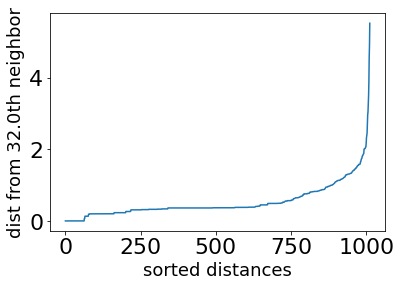

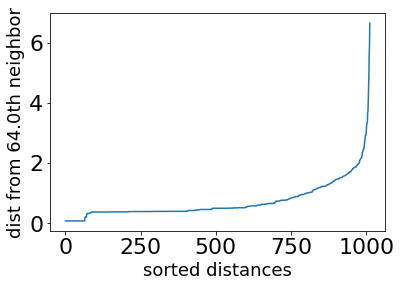

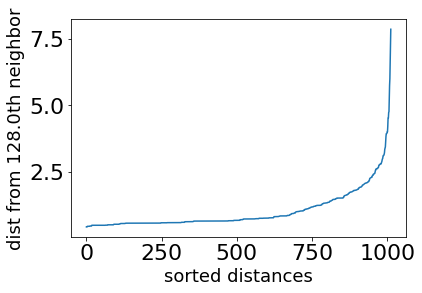

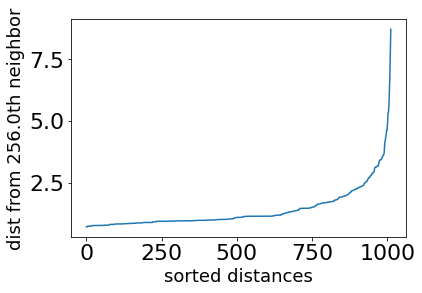

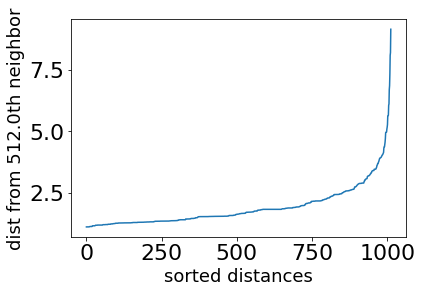

In [32]:

# SQUAREFORM
dist = squareform(pdist(scaled_df, 'euclidean')) # pair wise distance

for i in range(5, 10):
  k = math.pow(2, i)
  kth_distances = []
  for d in dist:
    index_kth_distance = np.argsort(d)[int(k)]
    kth_distances.append(d[index_kth_distance]) 
  plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
  plt.ylabel('dist from %sth neighbor' % k, fontsize=18)
  plt.xlabel('sorted distances', fontsize=18)
  plt.tick_params(axis='both', which='major', labelsize=22)
  plt.show()

In [36]:
plot_idx = 1
plot_res = res[plot_idx]['res']
columns = []
for c in df_1.columns:
  columns.append(c)
x = columns[0]
y = columns[1]
z = columns[2]

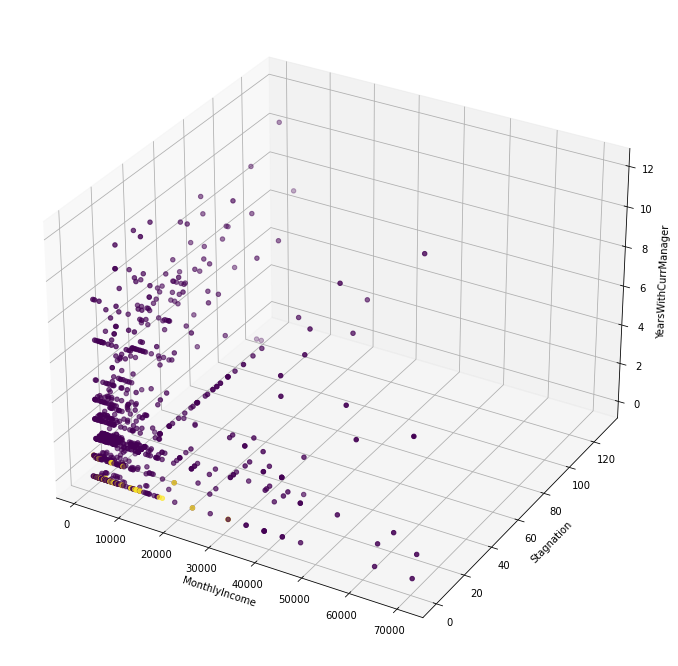

In [37]:
fig = plt.figure(figsize=(16,12))
ax = fig.gca(projection='3d')
ax.scatter(df_1[x],
           df_1[y],
           df_1[z],
           c=plot_res.labels_, marker='o')
ax.set_xlabel(x)
ax.set_ylabel(y)
ax.set_zlabel(z)
plt.show()